## Train ver3.1

@Juran 2021.11.30

- create_data_ver3.1로 생성된 데이터셋 사용
- 미디어파이프 랜드마크 8-5번, 8-0번, 7-0번 사이 거리 측정하여 데이터셋 생성
- ver3.0 z좌표 고려 안함 & 코드 오류 수정 -> 두 벡터 사이 유클리드 거리 사용

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# 1 -> click
# 0 -> none

### 데이터셋 로드

In [3]:
df_click = pd.read_csv('dataset/dataset_click_ver3_1.csv')
del df_click['Unnamed: 0']
df_click.head()

,0,1,2,3
0,0.123421,0.348014,0.375801,1
1,0.127347,0.346963,0.376199,1
2,0.125835,0.347519,0.376901,1
3,0.123494,0.346019,0.376633,1
4,0.124907,0.347254,0.376921,1


In [5]:
df_click.tail()

,0,1,2,3
1829,0.084860,0.250267,0.313357,1
1830,0.088588,0.252296,0.315560,1
1831,0.087665,0.250667,0.311527,1
1832,0.088363,0.252362,0.313507,1
1833,0.088911,0.253370,0.316330,1


In [4]:
df_none = pd.read_csv('dataset/dataset_none_ver3_1.csv')
del df_none['Unnamed: 0']
df_none.head()

,0,1,2,3
0,0.243827,0.490555,0.429470,0
1,0.238780,0.495131,0.432374,0
2,0.230851,0.484009,0.423994,0
3,0.233743,0.483161,0.422337,0
4,0.230710,0.479666,0.419878,0


In [6]:
df_none.tail()

,0,1,2,3
1817,0.225320,0.458669,0.400109,0
1818,0.225807,0.460271,0.401534,0
1819,0.227421,0.459310,0.400316,0
1820,0.230247,0.463203,0.403559,0
1821,0.227566,0.461257,0.402396,0


In [7]:
df_data = pd.concat([df_click, df_none])
df_data.head()

,0,1,2,3
0,0.123421,0.348014,0.375801,1
1,0.127347,0.346963,0.376199,1
2,0.125835,0.347519,0.376901,1
3,0.123494,0.346019,0.376633,1
4,0.124907,0.347254,0.376921,1


#### x데이터와 y데이터 분리

In [8]:
df_target = df_data[['3']]
df_data = df_data[['0', '1', '2']]

In [9]:
df_target.head()

,3
0,1
1,1
2,1
3,1
4,1


### 모델 학습

#### train / test split

In [10]:
from sklearn import model_selection
x_train, x_test, y_train, y_test = model_selection.train_test_split(df_data, df_target, test_size=0.2,random_state=0)

In [11]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(2924, 3)
(2924, 1)
(732, 3)
(732, 1)


#### one-hot encoding

In [12]:
y_train.head()

,3
1520,0
1152,0
720,0
728,1
1273,0


In [13]:
from sklearn import preprocessing

# Apply 'One-hot encoding' on labels
enc = preprocessing.OneHotEncoder(categories='auto')

y_train = enc.fit_transform(y_train).toarray()
y_test = enc.fit_transform(y_test).toarray()

print(y_train.shape)
print(y_test.shape)

(2924, 2)
(732, 2)


In [14]:
y_train[:5]

# 0 -> [1, 0] -> none
# 1 -> [0, 1] -> clickss

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.]])

In [15]:
# # -> one-hot vector
# from tensorflow.keras import utils
# y_train = utils.to_categorical(x_train) # 0 or 1 -> one-hot vector
# y_test = utils.to_categorical(x_test) # 0 or 1 -> one-hot vector

#### 모델학습

In [16]:
import tensorflow as tf

from tensorflow.keras import datasets, utils
from tensorflow.keras import models, layers, activations, initializers, losses, optimizers, metrics

In [17]:
model = models.Sequential()

model.add(layers.Dense(input_dim=3, units=64, activation=None, kernel_initializer=initializers.he_uniform())) # he-uniform initialization

# model.add(layers.BatchNormalization()) # Use this line as if needed

model.add(layers.Activation('elu')) # elu, relu / layers.ELU, layers.LeakyReLU

model.add(layers.Dense(units=32, activation=None, kernel_initializer=initializers.he_uniform())) 
model.add(layers.Activation('elu')) 

model.add(layers.Dense(units=32, activation=None, kernel_initializer=initializers.he_uniform())) 
model.add(layers.Activation('elu'))

# 마지막 hidden layer droup out
model.add(layers.Dropout(rate=0.5))

model.add(layers.Dense(units=2, activation='softmax')) # Apply softmax function on model's output

In [18]:
model.compile(optimizer=optimizers.Adam(),
              loss=losses.categorical_crossentropy, 
              metrics=[metrics.categorical_accuracy])

In [19]:
history = model.fit(x_train, y_train, batch_size=200, epochs=100, validation_split=0.3) 

Epoch 1/100
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: unsupported operand type(s) for -: 'NoneType' and 'int'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: unsupported operand type(s) for -: 'NoneType' and 'int'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


2021-11-30 15:52:06.989711: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)
2021-11-30 15:52:06.990161: W tensorflow/core/platform/profile_utils/cpu_utils.cc:126] Failed to get CPU frequency: 0 Hz


 1/11 [=>............................] - ETA: 2s - loss: 0.6708 - categorical_accuracy: 0.5950WARNING:tensorflow:AutoGraph could not transform <function Model.make_test_function.<locals>.test_function at 0x1554c2040> and will run it as-is.
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: unsupported operand type(s) for -: 'NoneType' and 'int'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: unsupported operand type(s) for -: 'NoneType' and 'int'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
11/11 [==============================] - 0s 29ms/step - loss: 0.6294 - categorical_accuracy: 0.6177 - val_loss: 0.7133 - val_c

11/11 [==============================] - 0s 2ms/step - loss: 0.0033 - categorical_accuracy: 0.9996 - val_loss: 4.9549 - val_categorical_accuracy: 0.6219
Epoch 45/100
11/11 [==============================] - 0s 2ms/step - loss: 0.0028 - categorical_accuracy: 0.9993 - val_loss: 5.1856 - val_categorical_accuracy: 0.6241
Epoch 46/100
11/11 [==============================] - 0s 2ms/step - loss: 0.0034 - categorical_accuracy: 0.9997 - val_loss: 4.7555 - val_categorical_accuracy: 0.6435
Epoch 47/100
11/11 [==============================] - 0s 2ms/step - loss: 0.0027 - categorical_accuracy: 0.9995 - val_loss: 5.4719 - val_categorical_accuracy: 0.6185
Epoch 48/100
11/11 [==============================] - 0s 2ms/step - loss: 0.0057 - categorical_accuracy: 0.9989 - val_loss: 5.4486 - val_categorical_accuracy: 0.6230
Epoch 49/100
11/11 [==============================] - 0s 2ms/step - loss: 0.0038 - categorical_accuracy: 0.9992 - val_loss: 5.4478 - val_categorical_accuracy: 0.6128
Epoch 50/100
11/1

11/11 [==============================] - 0s 2ms/step - loss: 0.0024 - categorical_accuracy: 0.9993 - val_loss: 6.4730 - val_categorical_accuracy: 0.6344
Epoch 94/100
11/11 [==============================] - 0s 2ms/step - loss: 0.0015 - categorical_accuracy: 0.9993 - val_loss: 6.8181 - val_categorical_accuracy: 0.6241
Epoch 95/100
11/11 [==============================] - 0s 2ms/step - loss: 0.0039 - categorical_accuracy: 0.9968 - val_loss: 6.3920 - val_categorical_accuracy: 0.6310
Epoch 96/100
11/11 [==============================] - 0s 2ms/step - loss: 0.0035 - categorical_accuracy: 0.9973 - val_loss: 6.5040 - val_categorical_accuracy: 0.6230
Epoch 97/100
11/11 [==============================] - 0s 2ms/step - loss: 0.0016 - categorical_accuracy: 0.9999 - val_loss: 6.1344 - val_categorical_accuracy: 0.6446
Epoch 98/100
11/11 [==============================] - 0s 2ms/step - loss: 0.0013 - categorical_accuracy: 0.9998 - val_loss: 6.4787 - val_categorical_accuracy: 0.6412
Epoch 99/100
11/1

#### 모델 정확도 측정

In [22]:
result = model.evaluate(x_test, y_test)

print('loss (cross-entropy) :', result[0])
print('test accuracy :', result[1])

23/23 [==============================] - 0s 500us/step - loss: 0.0012 - categorical_accuracy: 0.9986
loss (cross-entropy) : 0.0011589652858674526
test accuracy : 0.998633861541748


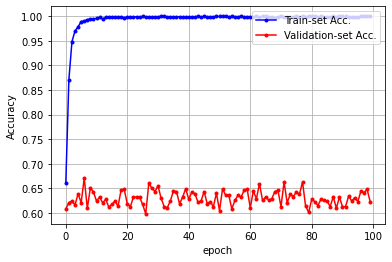

In [23]:
acc = history.history['categorical_accuracy']
val_acc = history.history['val_categorical_accuracy']

x_len = np.arange(len(acc))

plt.plot(x_len, acc, marker='.', c='blue', label="Train-set Acc.")
plt.plot(x_len, val_acc, marker='.', c='red', label="Validation-set Acc.")

plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('Accuracy')
plt.show()

#### 모델 저장

In [24]:
model.save('models/ver3/model_ver3_1.h5')

### 모델 테스트

In [25]:
angles = [0.1, 0.4, 0.4]

In [26]:
pred = model.predict([angles])
print(pred)

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: unsupported operand type(s) for -: 'NoneType' and 'int'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: unsupported operand type(s) for -: 'NoneType' and 'int'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
[[1.0743702e-04 9.9989259e-01]]


In [27]:
pred[0][0]

0.00010743702